In [ ]:
!pip install tensorflow pillow numpy


#VERİ SETİNİ YÜKLEME

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Colab Notebooks/skin_cancer.zip"
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


data_dir = "/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")

# ImageDataGenerator ile verileri normalize et
datagen = ImageDataGenerator(rescale=1.0/255)

# Eğitim verisi
train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Test verisi
test_data = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


print("Eğitim sınıf indeksleri:", train_data.class_indices)
print("Test sınıf indeksleri:", test_data.class_indices)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Eğitim sınıf indeksleri: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
Test sınıf indeksleri: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


In [ ]:
print(f"Eğitim verisi örnek sayısı: {train_data.samples}")
print(f"Test verisi örnek sayısı: {test_data.samples}")

Eğitim verisi örnek sayısı: 2239
Test verisi örnek sayısı: 118


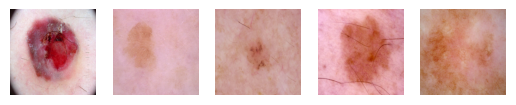

In [ ]:
import matplotlib.pyplot as plt

def show_sample_images(data):
    images, labels = next(data)
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

show_sample_images(train_data);

#VERİ GÖRSELLEŞTİRME



##Sınıf Dağılımının Görselleştirilmesi

###Eğitim Veri Seti İçin

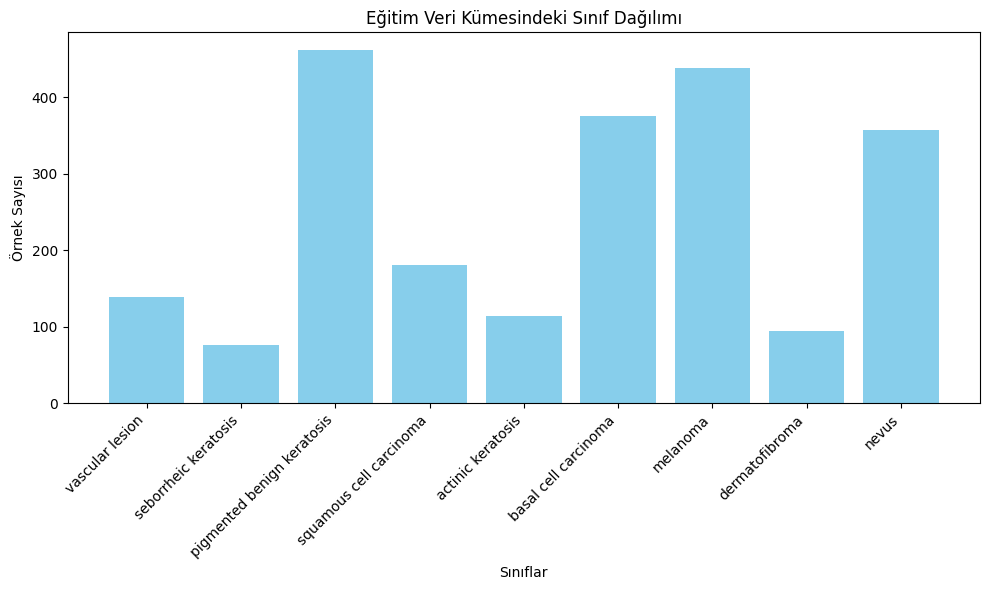

In [ ]:
import matplotlib.pyplot as plt
import os


train_class_names = os.listdir(train_dir)

class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in train_class_names]

plt.figure(figsize=(10, 6))
plt.bar(train_class_names, class_counts, color='skyblue')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')
plt.title('Eğitim Veri Kümesindeki Sınıf Dağılımı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Test Veri Seti İçin

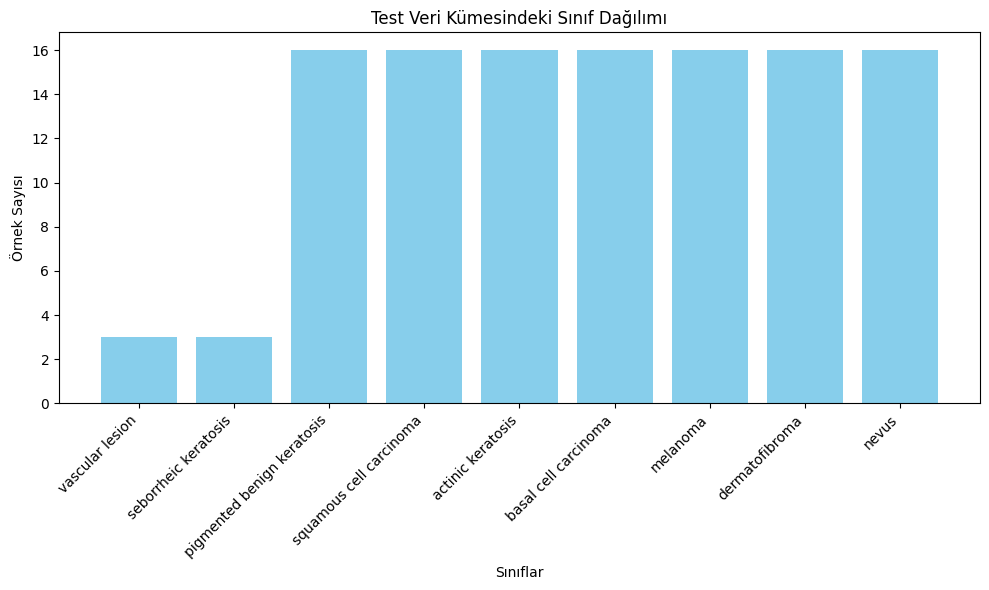

In [ ]:
test_class_names = os.listdir(test_dir)

class_counts = [len(os.listdir(os.path.join(test_dir, class_name))) for class_name in test_class_names]

plt.figure(figsize=(10, 6))
plt.bar(test_class_names, class_counts, color='skyblue')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')
plt.title('Test Veri Kümesindeki Sınıf Dağılımı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def get_image_sizes(directory):
    sizes = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    if img.format in ['JPEG', 'PNG', 'BMP', 'GIF']:
                        sizes.append(img.size)  # Resim boyutlarını al
            except Exception as e:
                print(f"Resim açılamadı: {file_path}, Hata: {e}")
    return sizes



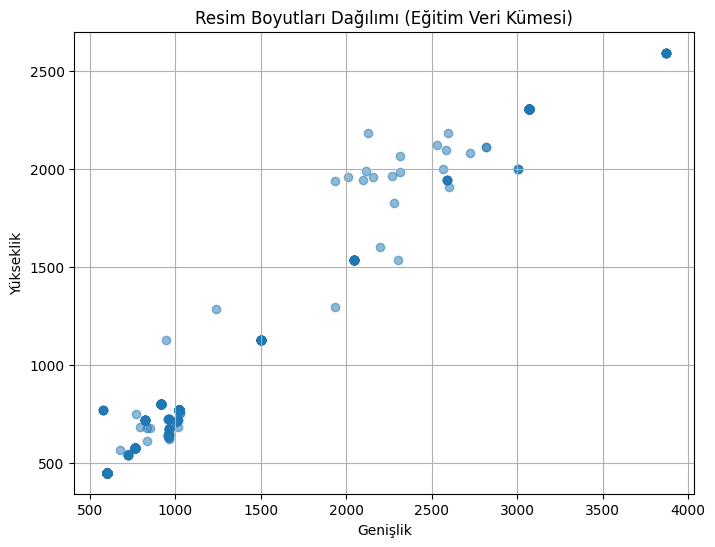

In [ ]:
train_sizes = get_image_sizes(train_dir)

if train_sizes:
    widths, heights = zip(*train_sizes)
    plt.figure(figsize=(8, 6))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Resim Boyutları Dağılımı (Eğitim Veri Kümesi)')
    plt.xlabel('Genişlik')
    plt.ylabel('Yükseklik')
    plt.grid(True)
    plt.show()
else:
    print("Hiç resim boyutu alınamadı.")

Bu kodun amacı

Datasetindeki tüm resimlerin boyutlarını analiz etmek

Hangi resimlerin çok büyük/küçük olduğunu veya farklı boyutlarda olduğunu grafik ile görmek

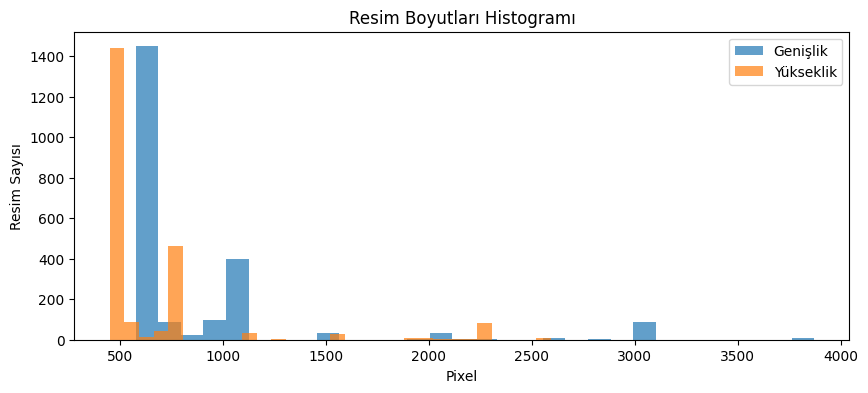

In [ ]:
    plt.figure(figsize=(10, 4))
    plt.hist(widths, bins=30, alpha=0.7, label='Genişlik')
    plt.hist(heights, bins=30, alpha=0.7, label='Yükseklik')
    plt.title('Resim Boyutları Histogramı')
    plt.xlabel('Pixel')
    plt.ylabel('Resim Sayısı')
    plt.legend()
    plt.show()

Bu histogram grafiği resimlerin genişlik ve yüksekliklerinin dağılımını gösteriyor.

Örneğin: 475-500 pixel aralığında 1400 resim gibi.

Böylece datasetindeki resim boyutlarının hangi aralıkta yoğunlaştığını görebiliyoruz.

Grafiklerde görüldüğü gibi görsel boyutlarında farklılıklar var. Ön işleme kısmında boyutlandırma yapılmalı.



In [ ]:
from PIL import Image
import numpy as np

def compute_average_color(image_path):
    with Image.open(image_path) as img:
        img = img.resize((64, 64))
        img_array = np.array(img)
        average_color = np.mean(img_array, axis=(0, 1))
    return average_color

Resmi açıyor ve 64x64 boyutuna küçültüyor (işlem hızını artırmak için).

img_array → Resmi numpy array olarak alıyor. Boyut: (64,64,3)

np.mean(img_array, axis=(0,1)) → Her renk kanalı (R,G,B) için tüm piksellerin ortalamasını alıyor.

Yani her resim için [ortalama kırmızı, ortalama yeşil, ortalama mavi] değeri döndürülüyor.

In [ ]:
average_colors = {}
for class_name in train_class_names:
    class_dir = os.path.join(train_dir, class_name)
    image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.endswith('.jpg')]

    avg_colors = [compute_average_color(image_path) for image_path in image_paths]
    average_colors[class_name] = np.mean(avg_colors, axis=0)

train_class_names → Eğitim veri setindeki sınıf isimleri.

Her sınıf için:

Sınıf klasöründeki tüm resimlerin yolunu alıyor

Her resmin ortalama rengini hesaplıyor

Sınıfın tüm resimleri için ortalama renk değerini al → tek bir [R,G,B] vektörü.

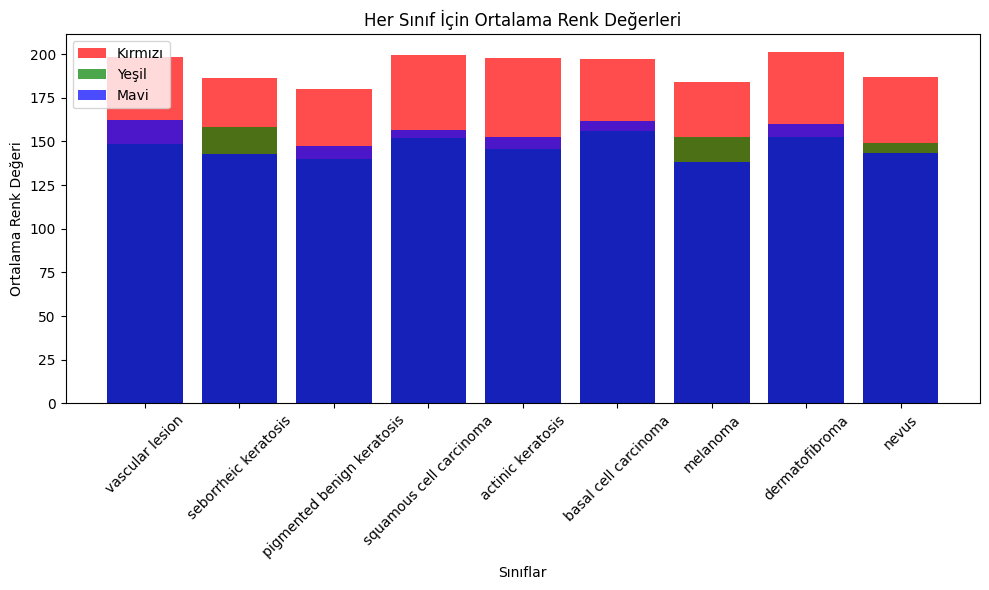

In [ ]:
colors = list(average_colors.values())
labels = list(average_colors.keys())

plt.figure(figsize=(10, 6))
plt.bar(labels, [color[0] for color in colors], color='r', alpha=0.7, label='Kırmızı')
plt.bar(labels, [color[1] for color in colors], color='g', alpha=0.7, label='Yeşil')
plt.bar(labels, [color[2] for color in colors], color='b', alpha=0.7, label='Mavi')

plt.xlabel('Sınıflar')
plt.ylabel('Ortalama Renk Değeri')
plt.title('Her Sınıf İçin Ortalama Renk Değerleri')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Bu analiz, model eğitmeden önce sınıfların renk karakteristiğini anlamana yardımcı oluyor.

Eğer bazı sınıflar çok farklı renk tonlarında yoğunsa, model bunu ayırıcı bir özellik olarak kullanabilir.

#Veri Önişleme

##Veri Arttırma

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Veri augmentasyonu yapacak ImageDataGenerator'ı tanımlıyoruz


->**Normalizasyon**: Piksel değerlerini 0-1 aralığına çeker (orijinal 0-255 aralığından).                                                                            
->**Döndürme**: Görüntüyü -40 ile +40 derece arasında rastgele döndürebilir.

->**Yatay kaydırma**: Görüntüyü yatayda %20’ye kadar kaydırabilir.

-> **Dikey kaydırma**: Görüntüyü dikeyde %20’ye kadar kaydırabilir.

-> **Kesme (shear) transformasyonu**: Görüntüyü yatay veya dikey eksende eğebilir .

->**Yakınlaştırma**: Görüntüyü %20’ye kadar büyütebilir veya küçültebilir.

-> **Yatay çevirme**: Görüntüyü yatayda rastgele çevirebilir.

-> **Boş alan doldurma**: Döndürme/kaydırma gibi işlemlerden oluşan boş pikselleri en yakın komşu piksel ile doldurur.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


Test veri kümesi için augmentasyon yapmaya gerek yok, sadece normalizasyon yeterli çünkü test verisi modelin normal hayatta karşılaşacağı veriler olacak

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 2239 images belonging to 9 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 118 images belonging to 9 classes.


Eğitim  ve test verilerini yükledik

##Bozuk Görüntü Dosyalarını Tespit Etme ve Temizleme


In [ ]:
import os
from PIL import Image

def check_and_remove_corrupted_images(directory):

    for subdir, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:

                with Image.open(file_path) as img:
                    img.verify()
            except (IOError, SyntaxError):
                print(f"Bozuk görüntü bulundu: {file_path}")
                os.remove(file_path)
                print(f"Silindi: {file_path}")


Bu fonksiyon, verilen klasördeki tüm görüntü dosyalarını tek tek kontrol eder. Her dosyayı açmayı ve veri bütünlüğünü doğrulamayı dener. Eğer dosya açılamaz veya doğrulama başarısız olursa, dosya bozuk kabul edilir ve silinir. Böylece eğitim sırasında hatalı görüntülerden kaynaklı sorunların önüne geçilmiş olur.

In [ ]:
check_and_remove_corrupted_images(train_dir)
check_and_remove_corrupted_images(test_dir)

##Boş ve Anlamsız Görüntülerin Tespiti

In [ ]:
import numpy as np

def check_for_empty_images(directory):

    for subdir, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    img_array = np.array(img)

                    if np.all(img_array == 255) or np.all(img_array == 0):
                        print(f"Boş veya tek renkli resim bulundu: {file_path}")
                        os.remove(file_path)
                        print(f"Silindi: {file_path}")
            except Exception as e:
                print(f"Resim açılırken hata oluştu: {file_path}, Hata: {e}")

Bu fonksiyon, belirtilen klasördeki tüm görüntü dosyalarını tek tek kontrol eder. Görüntü tamamen siyah veya beyaz ise, yani boş veya tek renkli kabul edilirse, dosya silinir. Böylece eğitim sırasında anlamsız veya hatalı verilerden kaynaklı sorunlar önlenir. Hata oluşursa, dosya silinmez ve ekrana hata mesajı yazılır.

In [ ]:
check_for_empty_images(train_dir)
check_for_empty_images(test_dir)

#CNN İLE MODEL OLUŞTURMA

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Veri yolları
data_dir = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")


## Eğitim veri artırma ve test için normalizasyon

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,          # Normalizasyon
    rotation_range=40,          # Döndürme
    width_shift_range=0.2,      # Yatay kaydırma
    height_shift_range=0.2,     # Dikey kaydırma
    shear_range=0.2,            # Kesme
    zoom_range=0.2,             # Yakınlaştırma
    horizontal_flip=True,       # Yatay çevirme
    fill_mode='nearest'         # Boşluk doldurma yöntemi
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)


## Eğitim ve test verilerini yükleme

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


print("Eğitim sınıf indeksleri:", train_data.class_indices)
print("Test sınıf indeksleri:", test_data.class_indices)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Eğitim sınıf indeksleri: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
Test sınıf indeksleri: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


## CNN Modeli Oluşturma


In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_data.class_indices), activation='softmax')
])

##Modeli Derleme

In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

##Model ismi ve özeti

In [ ]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_name = "CNN Baseline Model"

##Modeli Eğitme

In [ ]:
history_cnn = cnn_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.2366 - loss: 2.2580 - val_accuracy: 0.2083 - val_loss: 2.3627
Epoch 2/10
 1/69 ━━━━━━━━━━━━━━━━━━━━ 4:56 4s/step - accuracy: 0.3125 - loss: 1.7836

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.3125 - loss: 1.7836 - val_accuracy: 0.1875 - val_loss: 2.4630
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 323s 5s/step - accuracy: 0.3807 - loss: 1.6993 - val_accuracy: 0.3021 - val_loss: 2.2322
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.3750 - loss: 1.6505 - val_accuracy: 0.2604 - val_loss: 2.2565
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.4231 - loss: 1.5942 - val_accuracy: 0.2917 - val_loss: 2.1188
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.4688 - loss: 1.4886 - val_accuracy: 0.2188 - val_loss: 2.1682
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.4764 - loss: 1.5492 - val_accuracy: 0.3021 - val_loss: 2.5327
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.5000 - loss: 1.3081 - val_accuracy: 0.2812 - val_loss: 2.4672
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 306s 4s/step - accuracy: 0.4764 - loss: 1.4848 - val_accuracy: 0.3021 - val_l

##Eğitim ve doğrulama doğruluğu

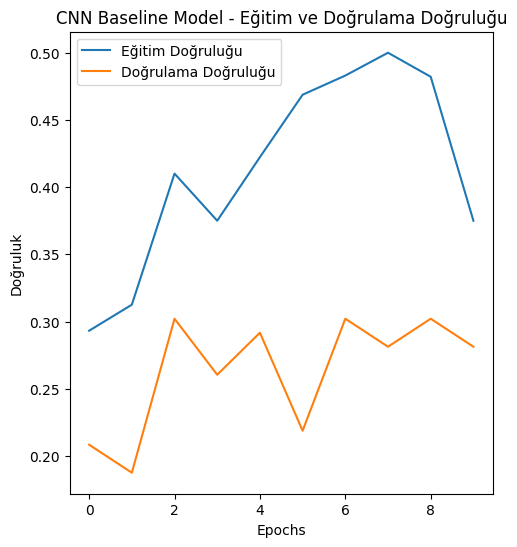

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_cnn.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title(f'{model_name} - Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()


##Eğitim ve doğrulama kaybı

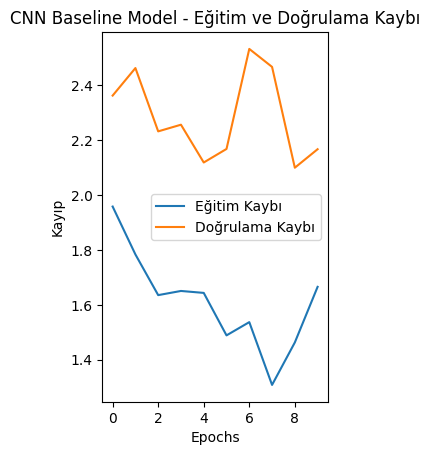

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Eğitim Kaybı')
plt.plot(history_cnn.history['val_loss'], label='Doğrulama Kaybı')
plt.title(f'{model_name} - Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

In [ ]:
cnn_model.save("cnn_skin_cancer_model.h5")


#LeNet İLE MODEL OLUŞTURMA



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import matplotlib.pyplot as plt

data_dir = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")

Kütüphaneleri yüklüyor ve pathleri ayarlıyoruz.

In [ ]:
datagen = ImageDataGenerator(rescale=1.0 / 255)


Verileri normalize etmek ve augmentasyon yapmak için ImageDataGenerator kullanıyoruz.

##Verileri yükleme


In [ ]:
train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


##LeNet Model İnşası

In [ ]:
lenet_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation="relu"),
    Dense(84, activation="relu"),
    Dense(len(train_data.class_indices), activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Model Derleme ve İsmi

In [ ]:
lenet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

lenet_model.summary()

model_name = "LeNet Model"


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)             │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 120)            │     5,393,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 9)              │           765 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,407,201 (20.63 MB)

 Trainable params: 5,407,201 (20.63 MB)

 Non-trainable params: 0 (0.00 B)

##Model Eğitimi

In [ ]:
model_name = "LeNet Model"

history_lenet = lenet_model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.1865 - loss: 2.1752 - val_accuracy: 0.2288 - val_loss: 2.2680
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.3867 - loss: 1.7398 - val_accuracy: 0.2797 - val_loss: 2.3916
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4638 - loss: 1.5269 - val_accuracy: 0.3136 - val_loss: 2.4835
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5062 - loss: 1.4564 - val_accuracy: 0.3305 - val_loss: 2.5056
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5300 - loss: 1.3485 - val_accuracy: 0.3220 - val_loss: 2.7121
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5741 - loss: 1.2503 - val_accuracy: 0.2712 - val_loss: 2.7270
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6067 - loss: 1.1265 - val_accuracy: 0.2966 - val_loss: 2.6036
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6188 - loss: 1.0877 - val_accuracy: 0.2712 - v

## Eğitim ve doğrulama doğruluğu



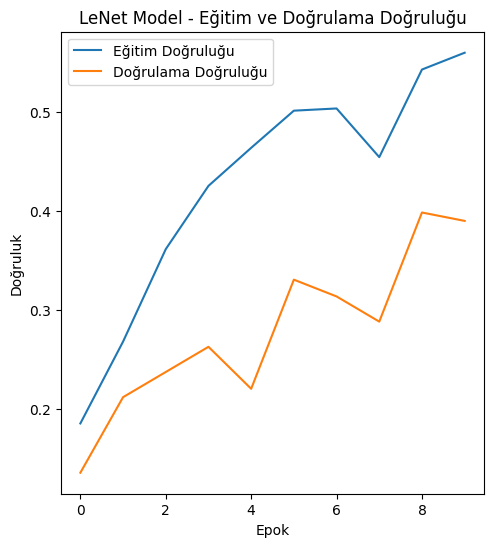

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(history_lenet.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_lenet.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title(f'{model_name} - Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

##Eğitim ve doğrulama kaybı

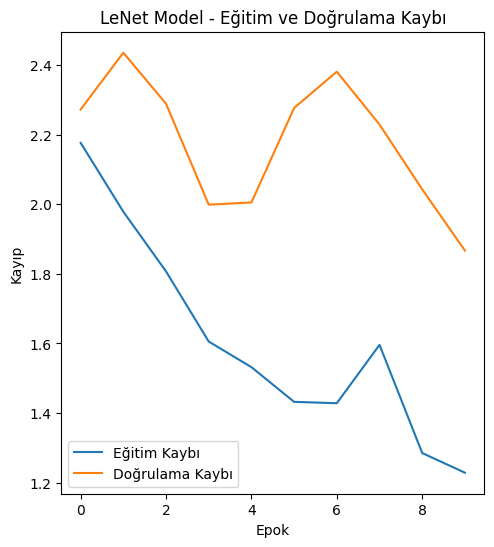

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lenet.history['loss'], label='Eğitim Kaybı')
plt.plot(history_lenet.history['val_loss'], label='Doğrulama Kaybı')
plt.title(f'{model_name} - Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epok')
plt.ylabel('Kayıp')
plt.legend()

##Modeli Kaydetme

In [ ]:
lenet_model.save("lenet_skin_cancer_model.h5")


#GoogleNet İLE MODEL OLUŞTURMA



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
import os
import matplotlib.pyplot as plt


data_dir = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")

Kütüphaneleri yüklüyor ve pathleri ayarlıyoruz.

In [ ]:
datagen = ImageDataGenerator(rescale=1.0 / 255)

Verileri normalize etmek ve augmentasyon yapmak için ImageDataGenerator kullanıyoruz.

## Verileri yükleme


In [ ]:
train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


GoogleNet (InceptionV3) modelini yüklüyoruz

In [ ]:
model = models.Sequential()

# Base model eklemek
model.add(base_model)

# Yeni katmanlar eklemek
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(train_data.class_indices), activation='softmax'))

# Önceden eğitilmiş katmanları dondurmak
base_model.trainable = False

# Modeli derliyoruz
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Model ismi
model_name = "GoogleNet (InceptionV3) Model"

Yeni bir model oluşturuyoruz, base model oluşturup bu modele katmanlar ekliyoruz ardından önceden eğitilmiş katmanları donduruyoruz.Modeli derleyip isim veriyoruz.(Transfer learning kavramı hakkında)

##Model Eğitimi

In [ ]:
model.build((None, 224, 224, 3))
model.summary()


history_inception = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,910,185 (91.21 MB)

 Trainable params: 2,107,401 (8.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step - accuracy: 0.2629 - loss: 2.6008 - val_accuracy: 0.3475 - val_loss: 1.8576
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.4385 - loss: 1.5025 - val_accuracy: 0.3814 - val_loss: 1.6794
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 283s 4s/step - accuracy: 0.5115 - loss: 1.3547 - val_accuracy: 0.4407 - val_loss: 1.6821
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.5471 - loss: 1.2830 - val_accuracy: 0.4831 - val_loss: 1.5321
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 286s 4s/step - accuracy: 0.5551 - loss: 1.2176 - val_accuracy: 0.4153 - val_loss: 1.6739
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.5970 - loss: 1.1263 - val_accuracy: 0.4237 - val_loss: 1.6553
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 285s 4s/step - accuracy: 0.6236 - loss: 1.0228 - val_accuracy: 0.4322 - val_loss: 1.6084
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 286s 4s/step - accuracy: 0.6261 - loss: 1.0206 - val_accuracy: 0.4661 - v

## Eğitim ve doğrulama doğruluğu


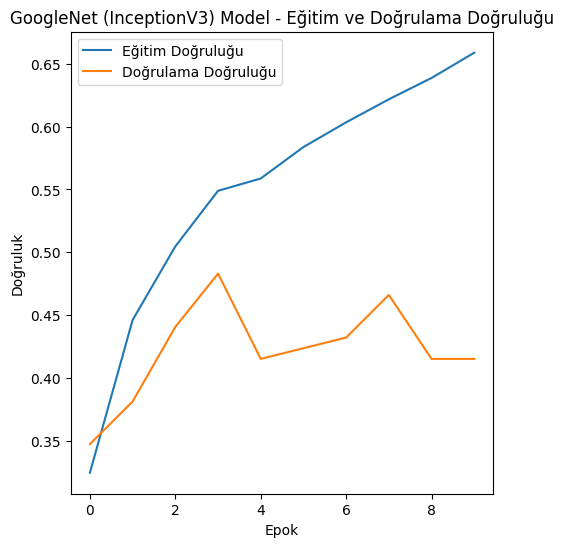

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_inception.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title(f'{model_name} - Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


## Eğitim ve doğrulama kaybı

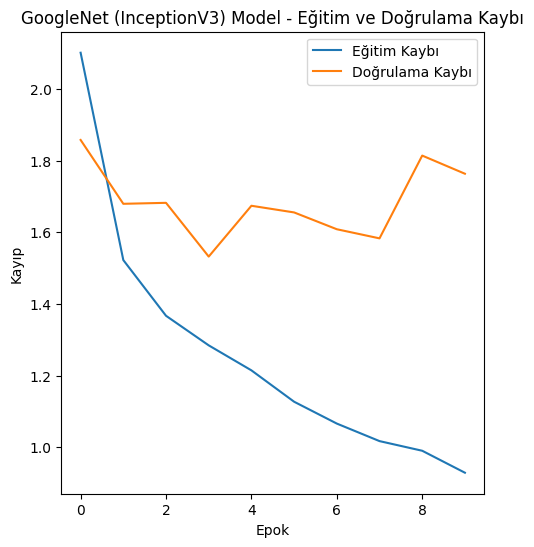

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['loss'], label='Eğitim Kaybı')
plt.plot(history_inception.history['val_loss'], label='Doğrulama Kaybı')
plt.title(f'{model_name} - Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epok')
plt.ylabel('Kayıp')
plt.legend()

#VGG16 İLE MODEL OLUŞTURMA


In [ ]:
Aynı işlemleri bu model için de yapıyoruz

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# VGG16 modelini önceden eğitilmiş ağırlıklarla yükle
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Base model katmanlarını dondur
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)

# Modelin tamamını oluştur
vgg_model = Model(inputs=base_model.input, outputs=predictions)


vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

vgg_model.summary()


model_name = "VGG16 Transfer Learning Model"

# Modeli eğit
history_vgg = vgg_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size,
    epochs=10
)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Eğitim Kaybı')
plt.plot(history_vgg.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title(f'{model_name} - Eğitim ve Doğrulama Kaybı')

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_vgg.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title(f'{model_name} - Eğitim ve Doğrulama Doğruluğu')

plt.show()

vgg_model.save("vgg16_skin_cancer_model.h5")

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,781,513 (56.39 MB)

 Trainable params: 66,825 (261.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
26/69 ━━━━━━━━━━━━━━━━━━━━ 12:31 17s/step - accuracy: 0.1413 - loss: 2.5526

KeyboardInterrupt: 

#MODELLERİ KARŞILAŞTIRMA



In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

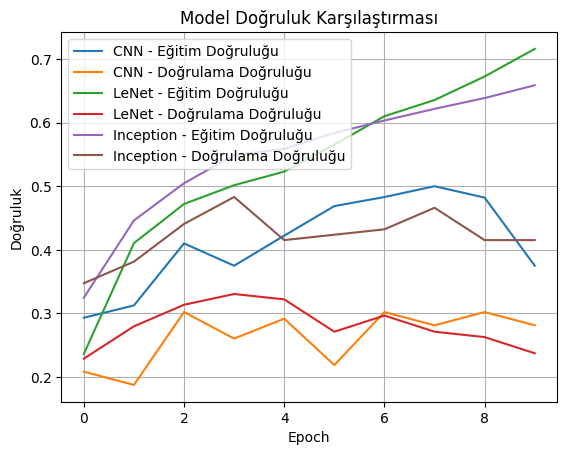

In [ ]:
import matplotlib.pyplot as plt

# CNN doğruluk
plt.plot(history_cnn.history['accuracy'], label='CNN - Eğitim Doğruluğu')
plt.plot(history_cnn.history['val_accuracy'], label='CNN - Doğrulama Doğruluğu')

# LeNet doğruluk
plt.plot(history_lenet.history['accuracy'], label='LeNet - Eğitim Doğruluğu')
plt.plot(history_lenet.history['val_accuracy'], label='LeNet - Doğrulama Doğruluğu')

# Inception doğruluk
plt.plot(history_inception.history['accuracy'], label='Inception - Eğitim Doğruluğu')
plt.plot(history_inception.history['val_accuracy'], label='Inception - Doğrulama Doğruluğu')

# Ortak ayarlar
plt.title('Model Doğruluk Karşılaştırması')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.8 MB/s eta 0:00:00


In [ ]:
%%writefile lenet_app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image


MODEL_PATH = "lenet_skin_cancer_model.h5"
model = tf.keras.models.load_model(MODEL_PATH)


class_names = [
    "vascular lesion",
    "seborrheic keratosis",
    "pigmented benign keratosis",
    "squamous cell carcinoma",
    "actinic keratosis",
    "basal cell carcinoma",
    "melanoma",
    "dermatofibroma",
    "nevus"
]

st.title("🩺 Skin Cancer Detection - LeNet Model")
st.write("Bir cilt lezyonu resmi yükleyin ve LeNet modelinin tahminini görün.")


uploaded_file = st.file_uploader("Resim seçin", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).resize((224, 224))
    st.image(img, caption="Yüklenen Resim", use_container_width=True)


    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100


    st.success(f"LeNet Tahmini: **{predicted_class}** (%{confidence:.2f})")



Writing lenet_app.py


In [ ]:
from pyngrok import ngrok


!streamlit run lenet_app.py &


public_url = ngrok.connect(8501)
print("Streamlit Uygulaması :", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.60.155.17:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2025-09-14T22:08:07+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-09-14T22:08:07+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-09-14T22:08:07+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.